In [1]:
import pandas as pd
import numpy as np
from urllib.parse import unquote

In [48]:
df = pd.read_csv("search_alignment.csv",sep=";")

def safeUnquote(x):
    try:
        return unquote(x)
    except Exception as e:
        print(x,e)
        return ""

df['q_enc'] = df['query'].map(lambda x:safeUnquote(x))
df.head()

,mark,query,url,q_enc
0,+,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/e3/71/7c152...,как правильно писать разлив или розлив
1,-,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/0c/07/b0ae9...,как правильно писать разлив или розлив
2,-,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/bc/6e/fd377...,как правильно писать разлив или розлив
3,+,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/e3/71/7c152...,как правильно писать разлив или розлив
4,-,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/bb/30/69e3c...,как правильно писать разлив или розлив


In [3]:
df[df['q_enc']=='']

,mark,query,url,q_enc


In [4]:
import requests,json

text2vec_cache = {}

def text2vec(text):
    global text2vec_cache
    if text in text2vec_cache:
        return text2vec_cache[text]
    res = requests.get("http://127.0.0.1:6000/clip_text_encode",params=[("text",text)])
    res = json.loads(res.text)
    text2vec_cache[text] = np.array(res["embedding"])
    return text2vec_cache[text]

doc2vec_cache = {}

def doc2vec(text):
    global doc2vec_cache
    if text in doc2vec_cache:
        return doc2vec_cache[text]
    res = requests.get("http://127.0.0.1:6000/doc2vec",params=[("text",text)])
    res = json.loads(res.text)
    res["embedding"] = np.array(res["embedding"])
    doc2vec_cache[text] = res
    return doc2vec_cache[text]

In [49]:
%%time
df['clip_enc'] = df['q_enc'].map(lambda x:text2vec(x.replace("#","")))
df.head()

CPU times: user 304 ms, sys: 11.5 ms, total: 315 ms
Wall time: 33.7 s


,mark,query,url,q_enc,clip_enc
0,+,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/e3/71/7c152...,как правильно писать разлив или розлив,"[-0.0413382388651371, -0.07093463093042374, 0...."
1,-,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/0c/07/b0ae9...,как правильно писать разлив или розлив,"[-0.0413382388651371, -0.07093463093042374, 0...."
2,-,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/bc/6e/fd377...,как правильно писать разлив или розлив,"[-0.0413382388651371, -0.07093463093042374, 0...."
3,+,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/e3/71/7c152...,как правильно писать разлив или розлив,"[-0.0413382388651371, -0.07093463093042374, 0...."
4,-,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/bb/30/69e3c...,как правильно писать разлив или розлив,"[-0.0413382388651371, -0.07093463093042374, 0...."


In [50]:
%%time
df['doc_enc'] = df['q_enc'].map(lambda x:doc2vec(x.replace("#","")))
df.head()

CPU times: user 394 ms, sys: 7.88 ms, total: 402 ms
Wall time: 5.49 s


,mark,query,url,q_enc,clip_enc,doc_enc
0,+,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/e3/71/7c152...,как правильно писать разлив или розлив,"[-0.0413382388651371, -0.07093463093042374, 0....","{'embedding': [-0.006448028143495321, 0.020241..."
1,-,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/0c/07/b0ae9...,как правильно писать разлив или розлив,"[-0.0413382388651371, -0.07093463093042374, 0....","{'embedding': [-0.006448028143495321, 0.020241..."
2,-,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/bc/6e/fd377...,как правильно писать разлив или розлив,"[-0.0413382388651371, -0.07093463093042374, 0....","{'embedding': [-0.006448028143495321, 0.020241..."
3,+,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/e3/71/7c152...,как правильно писать разлив или розлив,"[-0.0413382388651371, -0.07093463093042374, 0....","{'embedding': [-0.006448028143495321, 0.020241..."
4,-,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/bb/30/69e3c...,как правильно писать разлив или розлив,"[-0.0413382388651371, -0.07093463093042374, 0....","{'embedding': [-0.006448028143495321, 0.020241..."


In [7]:
df['q_enc'][0]

'как правильно писать разлив или розлив'

In [51]:
import pickle

with open("dict_store_new.pkl","rb") as fl:
    indexedVideos = pickle.load(fl)

print(len(indexedVideos))

10421


In [52]:
len(indexedVideos)/400000 * 100

2.60525

In [9]:
def preprocessVideoForQuery(url,query):
    # 1) Find url
    iVideo = None
    for o in indexedVideos:
        if o['url']!=url:continue
        iVideo = o
        break
    if iVideo is None:
        print(url,"has not indexed yet")
        return
    # 2) Preprocess query
    clip_emb = text2vec(query.replace("#",""))
    doc_enc = doc2vec(query)
    doc_emb = doc_enc['embedding']
    doc_lemmed = set(doc_enc['lemmed'] if 'lemmed' in doc_enc else [])
    doc_words = set(query.replace(",","").lower().split(" "))
    # 3) Feature extracting
    features = []
    clip_innerprod = iVideo['clip_embeddings'].dot(clip_emb)
    features.append(clip_innerprod.min())
    features.append(clip_innerprod.mean())
    features.append(clip_innerprod.max())
    features.append(clip_innerprod.std())
    doc_innerprod = iVideo['description_embedding'].dot(doc_emb)
    features.append(doc_innerprod)
    doc_innerprod2 = iVideo['transcription_embedding'].dot(doc_emb)
    features.append(doc_innerprod2)
    features.append(max(features))
    # 3.2) Words calculating
    description_words = set(iVideo['description'].lower().split(" "))
    description_words_comp = len(description_words & doc_words) / max(len(doc_words),1)
    features.append(description_words_comp)
    transcription_words = set(iVideo['transcription'].split(" "))
    transcription_words_comp = len(transcription_words & doc_words) / max(len(doc_words),1)
    features.append(transcription_words_comp)
    transcription_words2 = set(iVideo['transcription_lemmed'])
    transcription_words_comp2 = len(transcription_words2 & doc_lemmed) / max(len(doc_lemmed),1)
    features.append(transcription_words_comp2)
    features.append(max(features))
    return features

In [10]:
%%time
preprocessVideoForQuery('https://cdn-st.rutubelist.ru/media/ee/80/29098d1e4b93ad7f025cbe1b7fe7/fhd.mp4',
                        'как резать стекло под водой')

CPU times: user 3.44 ms, sys: 277 µs, total: 3.72 ms
Wall time: 2.61 ms


[0.2172265966395708,
 0.29435148639561737,
 0.3811079639044104,
 0.054979991143736036,
 0.5510368442600055,
 0.6062659757908622,
 0.6062659757908622,
 0.2,
 0.8,
 0.8,
 0.8]

In [53]:
%%time
y_goal = []

for url,query in zip(df['url'],df['q_enc']):
    y_goal.append(preprocessVideoForQuery(url,query))

CPU times: user 1.23 s, sys: 14.9 ms, total: 1.25 s
Wall time: 1.94 s


In [54]:
len(y_goal)

2611

In [55]:
df['sign'] = df['mark'].map(lambda x:int(x=='-')-int(x=='+'))
df.head()

,mark,query,url,q_enc,clip_enc,doc_enc,sign
0,+,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/e3/71/7c152...,как правильно писать разлив или розлив,"[-0.0413382388651371, -0.07093463093042374, 0....","{'embedding': [-0.006448028143495321, 0.020241...",-1
1,-,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/0c/07/b0ae9...,как правильно писать разлив или розлив,"[-0.0413382388651371, -0.07093463093042374, 0....","{'embedding': [-0.006448028143495321, 0.020241...",1
2,-,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/bc/6e/fd377...,как правильно писать разлив или розлив,"[-0.0413382388651371, -0.07093463093042374, 0....","{'embedding': [-0.006448028143495321, 0.020241...",1
3,+,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/e3/71/7c152...,как правильно писать разлив или розлив,"[-0.0413382388651371, -0.07093463093042374, 0....","{'embedding': [-0.006448028143495321, 0.020241...",-1
4,-,%D0%BA%D0%B0%D0%BA%20%D0%BF%D1%80%D0%B0%D0%B2%...,https://cdn-st.rutubelist.ru/media/bb/30/69e3c...,как правильно писать разлив или розлив,"[-0.0413382388651371, -0.07093463093042374, 0....","{'embedding': [-0.006448028143495321, 0.020241...",1


In [56]:
doc_enc_all = np.zeros((len(df),512))

for i,enc in enumerate(df['clip_enc']):
    doc_enc_all[i] = enc

doc_enc_all

array([[-0.04133824, -0.07093463,  0.01293664, ...,  0.04036916,
         0.02100877, -0.01856034],
       [-0.04133824, -0.07093463,  0.01293664, ...,  0.04036916,
         0.02100877, -0.01856034],
       [-0.04133824, -0.07093463,  0.01293664, ...,  0.04036916,
         0.02100877, -0.01856034],
       ...,
       [-0.01243007,  0.04091292, -0.08990358, ...,  0.03267707,
         0.04393494, -0.06909921],
       [ 0.01985355,  0.04405173, -0.04446792, ..., -0.02272687,
         0.01593379, -0.05146883],
       [ 0.01985355,  0.04405173, -0.04446792, ..., -0.02272687,
         0.01593379, -0.05146883]])

In [84]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca.fit(doc_enc_all)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
import torch
import torch.nn as nn

In [85]:
Tdoc_enc_all = torch.Tensor(pca.transform(doc_enc_all))
Ty_goal = torch.Tensor(y_goal)
Tsign = torch.Tensor(df['sign'])

In [86]:
Tdoc_enc_all.shape,Ty_goal.shape,Tsign.shape

(torch.Size([2611, 6]), torch.Size([2611, 11]), torch.Size([2611]))

In [87]:
model = nn.Sequential(
    nn.Linear(Tdoc_enc_all.shape[1],Ty_goal.shape[1]),
    nn.Dropout(p=0.2),
    nn.Sigmoid() # -> (0,1) important!
)

opt = torch.optim.Adam(model.parameters(),lr=1e-3,weight_decay=1e-3)

In [39]:
def calcAccuracy(weighted_sum,Tsign):
    queries = list(set(df['q_enc']))
    np_ws = weighted_sum.detach().numpy().sum(axis=1)
    np_signs = Tsign.numpy()
    all_signs = 0
    correct_signs = 0
    for q in queries[2:]:
        inds = (df['q_enc']==q).to_numpy()
        np_ws_q = np_ws[inds]
        np_signs_q = np_signs[inds]
        stack = np.vstack((np_ws_q,np_signs_q)).T
        stack = stack[stack[:, 0].argsort()]
        plus_count = (stack[:,1]>0).sum()
        minus_count = (stack[:,1]<0).sum()
        correct_pluses = sum(stack[:plus_count,1]>0)
        correct_minuses = sum(stack[-minus_count:,1]<0)
        all_signs += plus_count+minus_count
        correct_signs += correct_pluses+correct_minuses
        # print(q,correct_pluses+correct_minuses,plus_count+minus_count)
    return correct_signs/all_signs

#calcAccuracy(weighted_sum,Tsign)

In [88]:
history = []

for epoch in range(10001):
    opt.zero_grad()
    m_coefs = model(Tdoc_enc_all)
    m_coefs = nn.functional.normalize(m_coefs, p=1)
    weighted_sum = m_coefs*Ty_goal
    weighted_sum.shape
    loss = (weighted_sum.sum(axis=1)*Tsign).sum()
    loss.backward()
    opt.step()
    if(epoch%2000==0):
        print(epoch,"Loss:",loss.item(),"Acc:",calcAccuracy(weighted_sum,Tsign) )
    history.append(loss.item())

0 Loss: -12.166735649108887 Acc: 0.6395080707148347
2000 Loss: -64.0328140258789 Acc: 0.7056110684089162
4000 Loss: -74.89586639404297 Acc: 0.7040737893927748
6000 Loss: -84.94691467285156 Acc: 0.7232897770945427
8000 Loss: -85.33394622802734 Acc: 0.6963873943120676
10000 Loss: -93.42465209960938 Acc: 0.7148347425057648


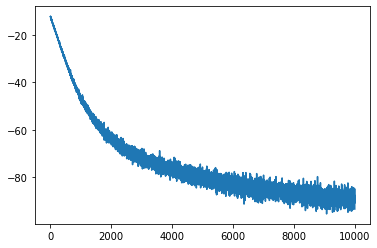

In [89]:
import matplotlib.pyplot as plt

plt.plot(history)

In [42]:
def getCoefsByPrompt(query):
    if type(query)==str:
        query = text2vec(query)
    model.eval()
    enc = pca.transform(query.reshape(1,-1))
    with torch.no_grad():
        enc = torch.Tensor(enc)
        coefs = model(enc)
        return coefs.numpy()[0]

def keyMatching(arr):
    features = []
    features.append("clip_innerprod.min()   ")
    features.append("clip_innerprod.mean()  ")
    features.append("clip_innerprod.max()   ")
    features.append("clip_innerprod.std()   ")
    features.append("descr_innerprod        ")
    features.append("trans_innerprod        ")
    features.append("max(features)          ")
    # 3.2) Words calculating
    features.append("descr_words_comp       ")
    features.append("trans_words_comp       ")
    features.append("trans_lemmed_words_comp")
    features.append("max(features)          ")
    norm = max(arr)
    for k,v in zip(features,arr):
        print(k,round(v,5),'*'*round(v/norm*50),sep='\t')

In [90]:
keyMatching(getCoefsByPrompt("котики"))

clip_innerprod.min()   	0.88502	********************************************
clip_innerprod.mean()  	0.9993	**************************************************
clip_innerprod.max()   	0.98552	*************************************************
clip_innerprod.std()   	0.00707	
descr_innerprod        	0.00576	
trans_innerprod        	0.00525	
max(features)          	0.00614	
descr_words_comp       	0.02206	*
trans_words_comp       	0.0	
trans_lemmed_words_comp	3e-05	
max(features)          	0.00039	


In [91]:
keyMatching(getCoefsByPrompt("геншин импакт"))

clip_innerprod.min()   	0.0015	
clip_innerprod.mean()  	0.09208	*****
clip_innerprod.max()   	0.99885	**************************************************
clip_innerprod.std()   	0.02188	*
descr_innerprod        	0.00979	
trans_innerprod        	0.0035	
max(features)          	0.08714	****
descr_words_comp       	0.00654	
trans_words_comp       	0.81186	*****************************************
trans_lemmed_words_comp	0.43724	**********************
max(features)          	0.55529	****************************


In [92]:
keyMatching(getCoefsByPrompt("как правильно розлив или разлив"))

clip_innerprod.min()   	0.04261	***
clip_innerprod.mean()  	0.35413	*************************
clip_innerprod.max()   	0.72186	**************************************************
clip_innerprod.std()   	0.66951	**********************************************
descr_innerprod        	0.00153	
trans_innerprod        	0.00524	
max(features)          	0.00549	
descr_words_comp       	0.51921	************************************
trans_words_comp       	0.0132	*
trans_lemmed_words_comp	0.01945	*
max(features)          	0.09458	*******


In [46]:
model[0]

Linear(in_features=5, out_features=11, bias=True)

In [260]:
Tdoc_enc_all

tensor([[-0.3554,  0.1352, -0.2220,  0.1183],
        [-0.3554,  0.1352, -0.2220,  0.1183],
        [-0.3554,  0.1352, -0.2220,  0.1183],
        ...,
        [-0.1671, -0.0668,  0.2023,  0.1282],
        [-0.1671, -0.0668,  0.2023,  0.1282],
        [-0.1671, -0.0668,  0.2023,  0.1282]])

In [258]:
mu = np.mean(doc_enc_all, axis=0)
pca_M = pca.components_.T
pca_M.shape,mu.shape

((768, 4), (768,))

In [259]:
(doc_enc_all-mu).dot(pca_M)

array([[-0.35536303,  0.13516976, -0.2220154 ,  0.11829696],
       [-0.35536303,  0.13516976, -0.2220154 ,  0.11829696],
       [-0.35536303,  0.13516976, -0.2220154 ,  0.11829696],
       ...,
       [-0.16711572, -0.06676016,  0.20230792,  0.12821883],
       [-0.16711572, -0.06676016,  0.20230792,  0.12821883],
       [-0.16711572, -0.06676016,  0.20230792,  0.12821883]])

In [261]:
with torch.no_grad():
    coefs=model(Tdoc_enc_all)
coefs

tensor([[0.0030, 0.0056, 0.0335,  ..., 0.7584, 0.9657, 0.1550],
        [0.0030, 0.0056, 0.0335,  ..., 0.7584, 0.9657, 0.1550],
        [0.0030, 0.0056, 0.0335,  ..., 0.7584, 0.9657, 0.1550],
        ...,
        [0.0032, 0.0023, 0.3393,  ..., 0.2133, 0.7533, 0.3901],
        [0.0032, 0.0023, 0.3393,  ..., 0.2133, 0.7533, 0.3901],
        [0.0032, 0.0023, 0.3393,  ..., 0.2133, 0.7533, 0.3901]])

In [262]:
tmp = torch.Tensor((doc_enc_all-mu).dot(pca_M))

with torch.no_grad():
    coefs=model(Tdoc_enc_all)
coefs

tensor([[0.0030, 0.0056, 0.0335,  ..., 0.7584, 0.9657, 0.1550],
        [0.0030, 0.0056, 0.0335,  ..., 0.7584, 0.9657, 0.1550],
        [0.0030, 0.0056, 0.0335,  ..., 0.7584, 0.9657, 0.1550],
        ...,
        [0.0032, 0.0023, 0.3393,  ..., 0.2133, 0.7533, 0.3901],
        [0.0032, 0.0023, 0.3393,  ..., 0.2133, 0.7533, 0.3901],
        [0.0032, 0.0023, 0.3393,  ..., 0.2133, 0.7533, 0.3901]])

In [193]:
model_M = model[0].weight.detach().numpy().T
model_bias = model[0].bias.detach().numpy()

In [93]:
mu = np.mean(doc_enc_all, axis=0)
pca_M = pca.components_.T
np.savetxt("pca_M_clip.dat",pca_M)
np.savetxt("pca_mu_clip.dat",mu)
torch.save(model.state_dict(), 'sorter_model_clip.pt')

In [28]:
def getCoefsByPrompt_clip(query):
    if type(query)==str:
        query = text2vec(query)
    model.eval()
    enc = (query.reshape(1,-1)-mu).dot(pca_M)
    with torch.no_grad():
        enc = torch.Tensor(enc)
        coefs = model(enc)
        return coefs.numpy()

In [30]:
np.array(y_goal).dot(getCoefsByPrompt_clip("котики")[0])

array([1.24405396, 1.20763108, 1.10266294, 1.24405396, 1.06776868,
       1.18527723, 0.97038303, 0.93964607, 0.9045756 , 0.89513507,
       1.23140441, 0.98907937, 1.17709172, 1.04463675, 1.49808598,
       1.26073918, 1.27131302, 1.10548484, 1.24068639, 1.25376315,
       1.28561083, 1.35614811, 1.34535643, 0.96486246, 1.34032974,
       1.85757604, 1.03287872, 0.87057146, 0.96235485, 1.0282073 ,
       1.71830609, 1.31408132, 1.0107659 , 1.18310263, 0.91822496,
       0.87875636, 0.89958756, 1.86244804, 1.48938813, 1.10547872,
       1.02521794, 1.08637082, 0.88942351, 1.86748986, 0.92547074,
       1.35040871, 1.30121896, 1.22289629, 1.23706996, 1.21732854,
       1.07415688, 1.08356039, 1.00803001, 1.45521652, 1.26783567,
       1.22077463, 1.88150473, 1.14525004, 1.07966467, 1.21932371,
       1.41690006, 1.23035213, 1.22412113, 1.96375809, 0.96159405,
       1.09790467, 1.15989738, 1.05417998, 1.04635073, 0.87162323,
       1.71523512, 1.09690485, 1.0842694 , 1.21794992, 1.08329

In [206]:
Tdoc_enc_all.shape[1],Ty_goal.shape[1]

(30, 11)